# Sample Data Load

In [1]:
import os
import pandas as pd
root_dir ='data/0421mode_변환'
files = os.listdir(root_dir)

In [2]:
files

['ftp_p3_Converted.txt', 'ftp_p1p2_Converted.txt', 'hwy_Converted.txt']

In [3]:
use_cols = ['time','Ambient','EGSPD','VSPD_ajou','TQI_ACOR','TQI','Coolant','VSPD2','Fan_curr','C_Rad_in',
           'C_Head','C_H\C_out','Target_angle','Current_angle']
p1p2_df = pd.read_csv(root_dir+'/ftp_p1p2_Converted.txt',sep='\t',skiprows=[1],usecols=use_cols)
p1p2_df.head()

,time,Ambient,EGSPD,VSPD_ajou,TQI_ACOR,TQI,Coolant,VSPD2,Fan_curr,C_Rad_in,C_Head,C_H\C_out,Target_angle,Current_angle
0,0.040727,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.591950,25.124000,25.20000,25.162000,0.0,0.0
1,0.050572,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.591950,25.124000,25.20000,25.162000,0.0,0.0
2,0.060581,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.591950,25.124000,25.20000,25.162000,0.0,0.0
3,0.070663,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.593844,25.124000,25.20000,25.162000,0.0,0.0
4,0.080730,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.612541,25.124002,25.19998,25.161992,0.0,0.0


In [4]:
p3_df = pd.read_csv(root_dir+'/ftp_p3_Converted.txt',sep='\t',skiprows=[1],usecols=use_cols)
p3_df.head()

,time,Ambient,EGSPD,VSPD_ajou,TQI_ACOR,TQI,Coolant,VSPD2,Fan_curr,C_Rad_in,C_Head,C_H\C_out,Target_angle,Current_angle
0,0.047340,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.660775,98.362,102.809,85.295,0.0,0.0
1,0.057112,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.660775,98.362,102.809,85.295,0.0,0.0
2,0.066428,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.656157,98.362,102.809,85.295,0.0,0.0
3,0.077380,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.641780,98.362,102.809,85.295,0.0,0.0
4,0.087161,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.633998,98.362,102.809,85.295,0.0,0.0


In [5]:
hwy_df = pd.read_csv(root_dir+'/hwy_Converted.txt',sep='\t',skiprows=[1],usecols=use_cols)
hwy_df.head()

,time,Ambient,EGSPD,VSPD_ajou,TQI_ACOR,TQI,Coolant,VSPD2,Fan_curr,C_Rad_in,C_Head,C_H\C_out,Target_angle,Current_angle
0,0.042003,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.623325,85.813,90.126,72.474,0.0,0.0
1,0.052022,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.623325,85.813,90.126,72.474,0.0,0.0
2,0.062091,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.623325,85.813,90.126,72.474,0.0,0.0
3,0.072227,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.635830,85.813,90.126,72.474,0.0,0.0
4,0.082005,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.631047,85.813,90.126,72.474,0.0,0.0


# Arima를 통한 target 예측

$\partial t$는 일정하다고 가정

## Target value 확인

In [6]:
target_cols = ['C_Head']
df = p1p2_df.append([p3_df,hwy_df],ignore_index=True)
target_df = df[target_cols]
target_df.head()

,C_Head
0,25.20000
1,25.20000
2,25.20000
3,25.20000
4,25.19998


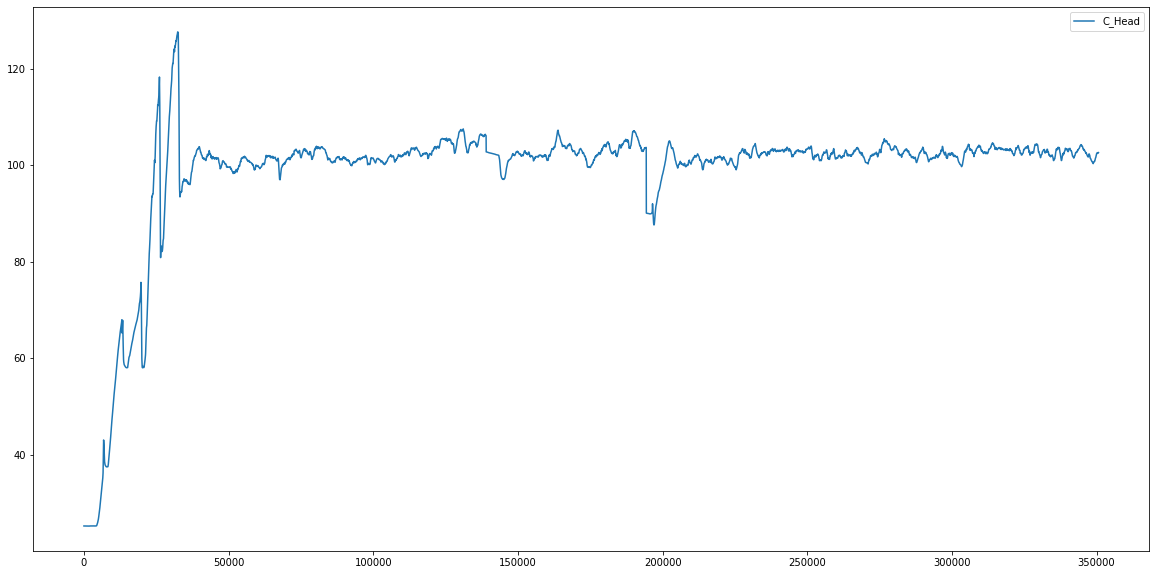

In [7]:
import matplotlib.pyplot as plt
target_df.plot(figsize=(20,10))
plt.show()

## Arima

pdq는 그리드서치를 통해 최적값 도출

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

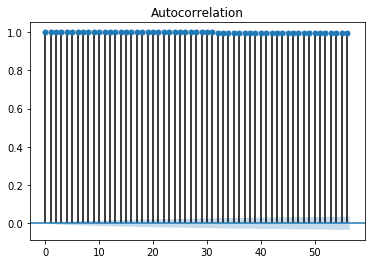

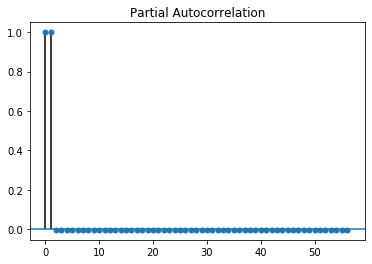

In [9]:
plot_acf(target_df[target_cols[0]]) ## 자기상관함수
plot_pacf(target_df[target_cols[0]]) ## 부분 자기상관함수
plt.show()

In [10]:
def evaluate_arima_model(X,arima_order):
    train_size = int(len(X)*0.66)
    train,test = X[0:train_size],X[train_size:]
    history = [x for x in train]
    
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit(disp=0)
        y_pred = model_fit.forcast()[0]
        predictions.append(y_pred)
        history.append(test[t])
    
    error = mean_squared_error(test,predictions)
    return error

In [11]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [12]:
## 자기상관도가 없어서 ARIMA로는 분석불가
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(target_df[target_cols[0]].values, p_values, d_values, q_values)

Best ARIMANone MSE=inf


# MLP를 통한 target 예측

window 사이즈 및 pred_t 변경을 통해 데이터 전처리

![](https://github.com/Namsik-Yoon/outsourcing/blob/master/%EA%B7%B8%EB%A6%BC1.png?raw=true)

In [13]:
args = {'sep':'\t','skiprows':[1],'usecols':use_cols}

df_0421 = pd.read_csv('data/0421mode_변환/ftp_p1p2_Converted.txt',**args).append\
([pd.read_csv('data/0421mode_변환/ftp_p3_Converted.txt',**args),
pd.read_csv('data/0421mode_변환/hwy_Converted.txt',**args) ],ignore_index=True).dropna().reset_index(drop=True)

df_0422 = pd.read_csv('data/0422mode_변환/ftp75_p1p2_Etas.txt',**args).append\
([pd.read_csv('data/0422mode_변환/ftp75_p3_Etas.txt',**args),
pd.read_csv('data/0422mode_변환/hwy_Etas.txt',**args) ],ignore_index=True).dropna().reset_index(drop=True)

df_0423 = pd.read_csv('data/0423mode_변환/ftp75_p1p2_Etas.txt',**args).append\
([pd.read_csv('data/0423mode_변환/ftp75_p3_Etas.txt',**args),
pd.read_csv('data/0423mode_변환/hwy_Etas.txt',**args) ],ignore_index=True).dropna().reset_index(drop=True)

df_0424 = pd.read_csv('data/0424mode_변환/ftp75_p1p2_Etas.txt',**args).append\
([pd.read_csv('data/0424mode_변환/ftp75_p3_Etas.txt',**args),
pd.read_csv('data/0424mode_변환/hwy_Etas.txt',**args) ],ignore_index=True).dropna().reset_index(drop=True)

df_0620 = pd.read_csv('data/realway_변환/morning_0620.txt',**args).dropna().reset_index(drop=True)
df_0621 = pd.read_csv('data/realway_변환/morning_0621.txt',**args).dropna().reset_index(drop=True)

In [21]:
import numpy as np
def make_data(df,window_size,pred_t,time_step=True):
    raw_X = df.drop(target_cols,axis=1).values
    raw_Y = df[target_cols].values
    temp = window_size+pred_t
    X = []
    for i in range(raw_X.shape[0]-window_size):
        subset = raw_X[i:(i+window_size)]
        X.append(subset.reshape(-1))

    X = np.array(X)
    Y = raw_Y[temp-1:]
    return X,Y

In [22]:
window_size = 10
pred_t = 1

X,Y = make_data(df_0421,window_size,pred_t)
for df in [df_0422,df_0423,df_0424,df_0620,df_0621]:
    X_,Y_ = make_data(df_0421,window_size,pred_t)
    X=np.append(X,X_,axis=0)
    Y=np.append(Y,Y_,axis=0)

In [23]:
X.shape,Y.shape

((2103912, 130), (2103912, 1))

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
mlp_model = Sequential()
mlp_model.add(Dense(128, input_dim=13*window_size, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(128,activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(128,activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(1))
mlp_model.compile(loss="mse", optimizer="adam")

In [30]:
mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               16768     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [31]:
early_stopping = EarlyStopping(patience=5)
mlp_model.fit(X,Y,epochs=100,batch_size=64,validation_split=0.7,shuffle=True,callbacks=[early_stopping])

Epoch 1/100
9863/9863 [==============================] - 44s 4ms/step - loss: 350.8778 - val_loss: 1554.4312
Epoch 2/100
9863/9863 [==============================] - 47s 5ms/step - loss: 127.2970 - val_loss: 1474.7535
Epoch 3/100
9863/9863 [==============================] - 37s 4ms/step - loss: 109.5697 - val_loss: 1184.9028
Epoch 4/100
9863/9863 [==============================] - 49s 5ms/step - loss: 94.2329 - val_loss: 1024.0527
Epoch 5/100
9863/9863 [==============================] - 48s 5ms/step - loss: 79.7450 - val_loss: 525.1348
Epoch 6/100
9863/9863 [==============================] - 49s 5ms/step - loss: 65.5761 - val_loss: 29.2341
Epoch 7/100
9863/9863 [==============================] - 47s 5ms/step - loss: 56.7739 - val_loss: 13.0770
Epoch 8/100
9863/9863 [==============================] - 50s 5ms/step - loss: 52.4173 - val_loss: 21.2192
Epoch 9/100
9863/9863 [==============================] - 45s 5ms/step - loss: 48.7757 - val_loss: 13.8603
Epoch 10/100
9863/9863 [==========

# LSTM을 이용한 target 예측

In [32]:
X = np.reshape(X,(-1,window_size,13))

In [33]:
X.shape,Y.shape

((2103912, 10, 13), (2103912, 1))

In [34]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape = (window_size, 13)))
lstm_model.add(Dense(1))
lstm_model.compile(loss="mse", optimizer="adam")

In [35]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               72704     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 72,833
Trainable params: 72,833
Non-trainable params: 0
_________________________________________________________________


In [36]:
early_stopping = EarlyStopping(patience=5)
lstm_model.fit(X,Y,epochs=100,batch_size=64,validation_split=0.7,shuffle=True,callbacks=[early_stopping])

Epoch 1/100
9863/9863 [==============================] - 81s 8ms/step - loss: 367.6923 - val_loss: 9.0681
Epoch 2/100
9863/9863 [==============================] - 133s 13ms/step - loss: 9.6933 - val_loss: 7.4725
Epoch 3/100
9863/9863 [==============================] - 144s 15ms/step - loss: 8.2620 - val_loss: 6.6390
Epoch 4/100
9863/9863 [==============================] - 154s 16ms/step - loss: 6.8635 - val_loss: 5.4247
Epoch 5/100
9863/9863 [==============================] - 149s 15ms/step - loss: 4.8437 - val_loss: 3.8908
Epoch 6/100
9863/9863 [==============================] - 120s 12ms/step - loss: 4.0258 - val_loss: 2.8767
Epoch 7/100
9863/9863 [==============================] - 138s 14ms/step - loss: 3.1836 - val_loss: 2.2163
Epoch 8/100
9863/9863 [==============================] - 111s 11ms/step - loss: 2.9321 - val_loss: 2.0303
Epoch 9/100
9863/9863 [==============================] - 169s 17ms/step - loss: 2.5726 - val_loss: 2.0298
Epoch 10/100
9863/9863 [======================

KeyboardInterrupt: 